## Desempleo

Porcentaje de variación de la tasa de desempleo en México

- DataFrame --> df_desempleo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def limpieza_indicadores(root):
    "limpieza del fichero inicial de cada indicador económico. Base de datos del Banco Mundial"
    
    df = pd.read_csv(root, header=0)
    df.rename(columns={'Country Name':'country', 'Indicator Name':'variables' }, inplace=True)
    df = df[df.country == 'México']
    df['country'] = df['country'].replace('México', 'MEXICO')
    df = df.drop(['country', 'Country Code', 'Indicator Code'], axis=1)
    
    
    return df

In [3]:
root_Desempleo = "Variables_economicas/Desempleo.csv"
df_Desempleo = limpieza_indicadores(root_Desempleo)
df_Desempleo = df_Desempleo.round(2)
df_Desempleo = df_Desempleo.replace({'Desempleo, total (% de la población activa total) (estimación modelado OIT)': 'Desempleo (%)'})
df_Desempleo.set_index('variables', inplace=True)

df_Desempleo.head()

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
variables,,,,,,,,,,,,,,,,,,,,,
Desempleo (%),3.37,4.44,7.1,5.47,4.24,3.73,2.6,2.65,2.63,3.0,...,5.17,4.89,4.91,4.81,4.31,3.86,3.42,3.28,3.48,4.71


In [4]:
df_desempleo = df_Desempleo.transpose()

In [5]:
df_desempleo.describe()

variables,Desempleo (%)
count,28.000000
mean,4.098571
std,1.029861
min,2.600000
25%,3.450000
50%,3.865000
75%,4.830000
max,7.100000


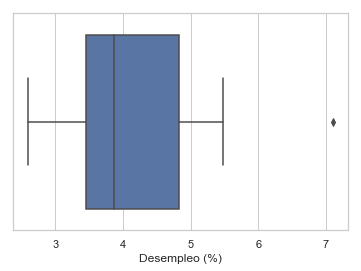

In [6]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_desempleo["Desempleo (%)"])

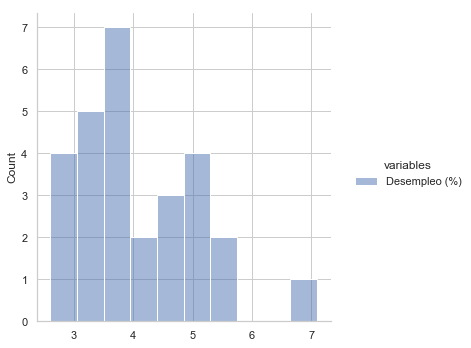

In [7]:
sns.displot(df_desempleo, bins=10)

Text(0.5, 1.0, 'Evolución de la tasa de desempleo en México')

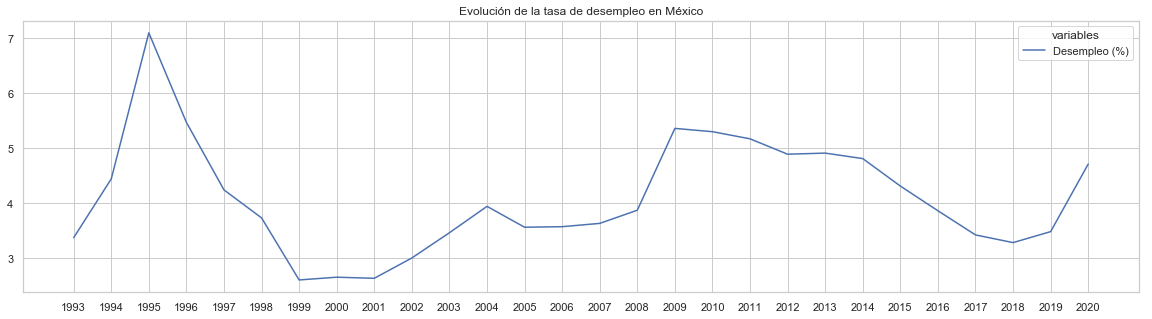

In [12]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_desempleo)
plt.title('Evolución de la tasa de desempleo en México')

In [9]:
df_desempleo.loc[df_desempleo['Desempleo (%)'] == df_desempleo['Desempleo (%)'].max()]

variables,Desempleo (%)
1995,7.1


In [10]:
df_desempleo.loc[df_desempleo['Desempleo (%)'] == df_desempleo['Desempleo (%)'].min()]

variables,Desempleo (%)
1999,2.6


In [11]:
%store df_desempleo

Stored 'df_desempleo' (DataFrame)
